In [54]:
#import required libraries
import pandas as pd
import numpy as np

In [55]:
# read maruti news headlines data
s=pd.read_csv('C:\\Users\\sasidharreddy\\Downloads\\masa.csv')

In [56]:
# drop nan values
s.dropna(inplace=True)

In [57]:
#rename columns
s.columns=['a','b','c']

In [58]:
s

,a,b,c
0,1.0,Maruti Suzuki India to increase mobile service...,"Oct 10, 2021 10:54 AM IST"
1,2.0,Maruti Suzuki Q2 PAT may dip 45.2% YoY to Rs 7...,"Oct 08, 2021 04:50 PM IST"
2,3.0,Maruti Suzuki Q2 PAT may dip 48.4% YoY to Rs 7...,"Oct 08, 2021 02:20 PM IST"
3,4.0,Maruti Suzuki shares rise after global brokera...,"Oct 05, 2021 01:25 PM IST"
4,5.0,"September auto review: Despite chip shortage, ...","Oct 04, 2021 01:28 PM IST"
...,...,...,...
794,20.0,Six in Sixty: Stocks you should keep on your r...,"Nov 01, 2016 02:41 PM IST"
795,21.0,Maruti Suzuki backs out of electric vehicle co...,"Oct 25, 2016 11:30 AM IST"
796,22.0,"Stocks in news: Batliboi, Tata Steel, NBCC, At...","Oct 05, 2016 08:17 AM IST"
797,23.0,SC lifts ban on registration of luxury diesel ...,"Aug 12, 2016 03:15 PM IST"


In [59]:
#change the type of date into numerics
s['date']=pd.to_datetime(s['c'])

C:\Users\sasidharreddy\anaconda77\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [60]:
#remove the time and retain only date
s['date2']=s['date'].apply(lambda x: x.date())

In [61]:
#droping the unwanted columns
s.drop(['a','c','date'],axis=1,inplace=True)

In [62]:
#reset the index 
s.reset_index(inplace=True)

In [63]:
#droping the index column
s.drop('index',axis=1,inplace=True)

In [15]:
!pip install vaderSentiment

In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [65]:
#function that takes sentence as input and returns sentiment score
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

In [66]:
#applying the above function
s['polarity']=s['b'].apply(lambda x: sentiment_scores(x))

In [67]:
s

,b,date2,polarity
0,Maruti Suzuki India to increase mobile service...,2021-10-10,0.3182
1,Maruti Suzuki Q2 PAT may dip 45.2% YoY to Rs 7...,2021-10-08,0.0000
2,Maruti Suzuki Q2 PAT may dip 48.4% YoY to Rs 7...,2021-10-08,0.0000
3,Maruti Suzuki shares rise after global brokera...,2021-10-05,0.2960
4,"September auto review: Despite chip shortage, ...",2021-10-04,0.5171
...,...,...,...
763,Six in Sixty: Stocks you should keep on your r...,2016-11-01,0.0000
764,Maruti Suzuki backs out of electric vehicle co...,2016-10-25,-0.0516
765,"Stocks in news: Batliboi, Tata Steel, NBCC, At...",2016-10-05,0.0000
766,SC lifts ban on registration of luxury diesel ...,2016-08-12,-0.5574


In [68]:
#reading the maruti stock price data
df=pd.read_csv('C:\\Users\\sasidharreddy\\Downloads\\MARUTI.NS.csv')

In [69]:
#calculating stock change value
df['change'] = round(df['Close'] - df['Open'],2)

In [70]:
#change the type of date into numerics
df['date1']=pd.to_datetime(df['Date'])

In [71]:
#remove the time and retain only date
df['date2']=df['date1'].apply(lambda x: x.date())

In [72]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,change,date1,date2
0,2017-01-02,5320.049805,5474.200195,5267.799805,5466.000000,5164.376953,651321.0,145.95,2017-01-02,2017-01-02
1,2017-01-03,5466.000000,5524.200195,5432.600098,5508.399902,5204.437012,631753.0,42.40,2017-01-03,2017-01-03
2,2017-01-04,5530.000000,5554.700195,5494.000000,5502.149902,5198.532227,679443.0,-27.85,2017-01-04,2017-01-04
3,2017-01-05,5525.100098,5649.899902,5525.100098,5634.950195,5324.003906,744210.0,109.85,2017-01-05,2017-01-05
4,2017-01-06,5650.000000,5657.299805,5597.000000,5615.549805,5305.674805,544695.0,-34.45,2017-01-06,2017-01-06
...,...,...,...,...,...,...,...,...,...,...
1178,2021-10-08,7548.700195,7571.950195,7401.149902,7430.000000,7430.000000,630622.0,-118.70,2021-10-08,2021-10-08
1179,2021-10-11,7420.200195,7814.799805,7419.799805,7700.799805,7700.799805,1069536.0,280.60,2021-10-11,2021-10-11
1180,2021-10-12,7687.899902,7750.000000,7630.049805,7693.799805,7693.799805,406814.0,5.90,2021-10-12,2021-10-12
1181,2021-10-13,7740.000000,7749.950195,7436.549805,7482.149902,7482.149902,1084436.0,-257.85,2021-10-13,2021-10-13


In [73]:
#removing the unwanted columns
df.drop(['Date','Adj Close','Volume','date1'],axis=1,inplace=True)

In [74]:
#merging the two dataframes w.r.t date
l=pd.merge(df,s,on='date2')

In [75]:
#removing the duplicate values if any.
l.drop_duplicates(inplace=True)

In [76]:
#reseting the index value
l.reset_index(inplace=True)

In [77]:
#droping the index column
l.drop(['index'],axis=1,inplace=True)

In [78]:
l

,Open,High,Low,Close,change,date2,b,polarity
0,5792.000000,5794.000000,5683.649902,5699.500000,-92.50,2017-01-13,Nifty snaps 3-day gains but manages to hold 84...,0.3716
1,6157.000000,6187.000000,6125.000000,6149.700195,-7.30,2017-02-06,Maruti seen biggest gainer in Toyota-Suzuki me...,0.0000
2,5924.000000,5928.950195,5875.000000,5887.750000,-36.25,2017-03-03,Maruti Suzuki launches Baleno RS at Rs 8.69 lakh,0.0000
3,5884.000000,5975.000000,5864.149902,5964.399902,80.40,2017-03-09,"Tata Motors, Volkswagen to jointly explore veh...",0.0000
4,5997.000000,6008.399902,5936.049805,5955.600098,-41.40,2017-03-10,"Tata Motors signs MoU with VW, Skoda to launch...",0.0000
...,...,...,...,...,...,...,...,...
652,7384.750000,7408.049805,7301.049805,7338.049805,-46.70,2021-09-30,Maruti Suzuki launches virtual car assistant S...,0.0000
653,7180.000000,7214.950195,7131.799805,7170.299805,-9.70,2021-10-04,"September auto review: Despite chip shortage, ...",0.5171
654,7164.799805,7300.000000,7155.649902,7258.250000,93.45,2021-10-05,Maruti Suzuki shares rise after global brokera...,0.2960
655,7548.700195,7571.950195,7401.149902,7430.000000,-118.70,2021-10-08,Maruti Suzuki Q2 PAT may dip 45.2% YoY to Rs 7...,0.0000


In [79]:
#importing the wanted libraries to visualise
import matplotlib
%matplotlib inline

In [80]:
import matplotlib.pyplot as plt

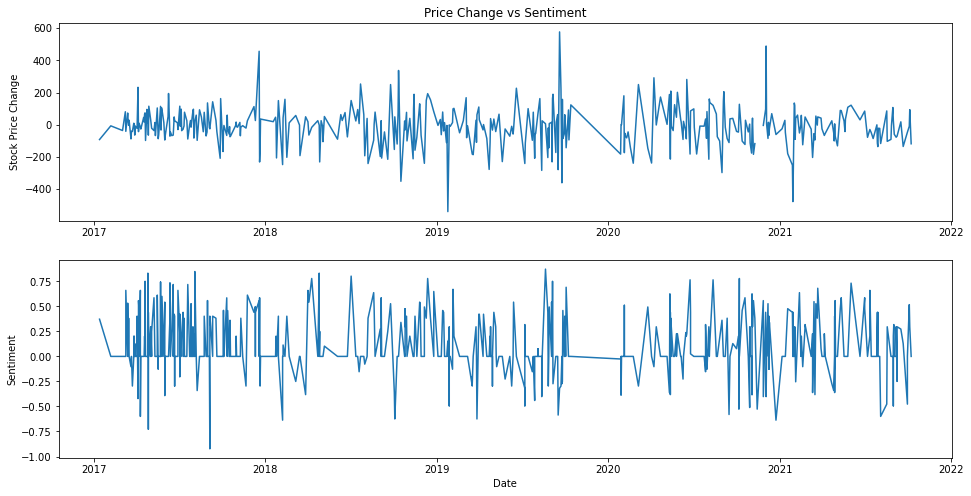

In [81]:
# chart with size (16,8)
# Idexx Laboratories
plt.figure(figsize=(16,8))

x = l.date2

y1 = l.change
y2 = l.polarity

plt.subplot(2, 1, 1)
plt.plot(x, y1)
plt.title('Price Change vs Sentiment')
plt.ylabel('Stock Price Change')

plt.subplot(2, 1, 2)
plt.plot(x, y2)
plt.xlabel('Date')
plt.ylabel('Sentiment')

plt.show()

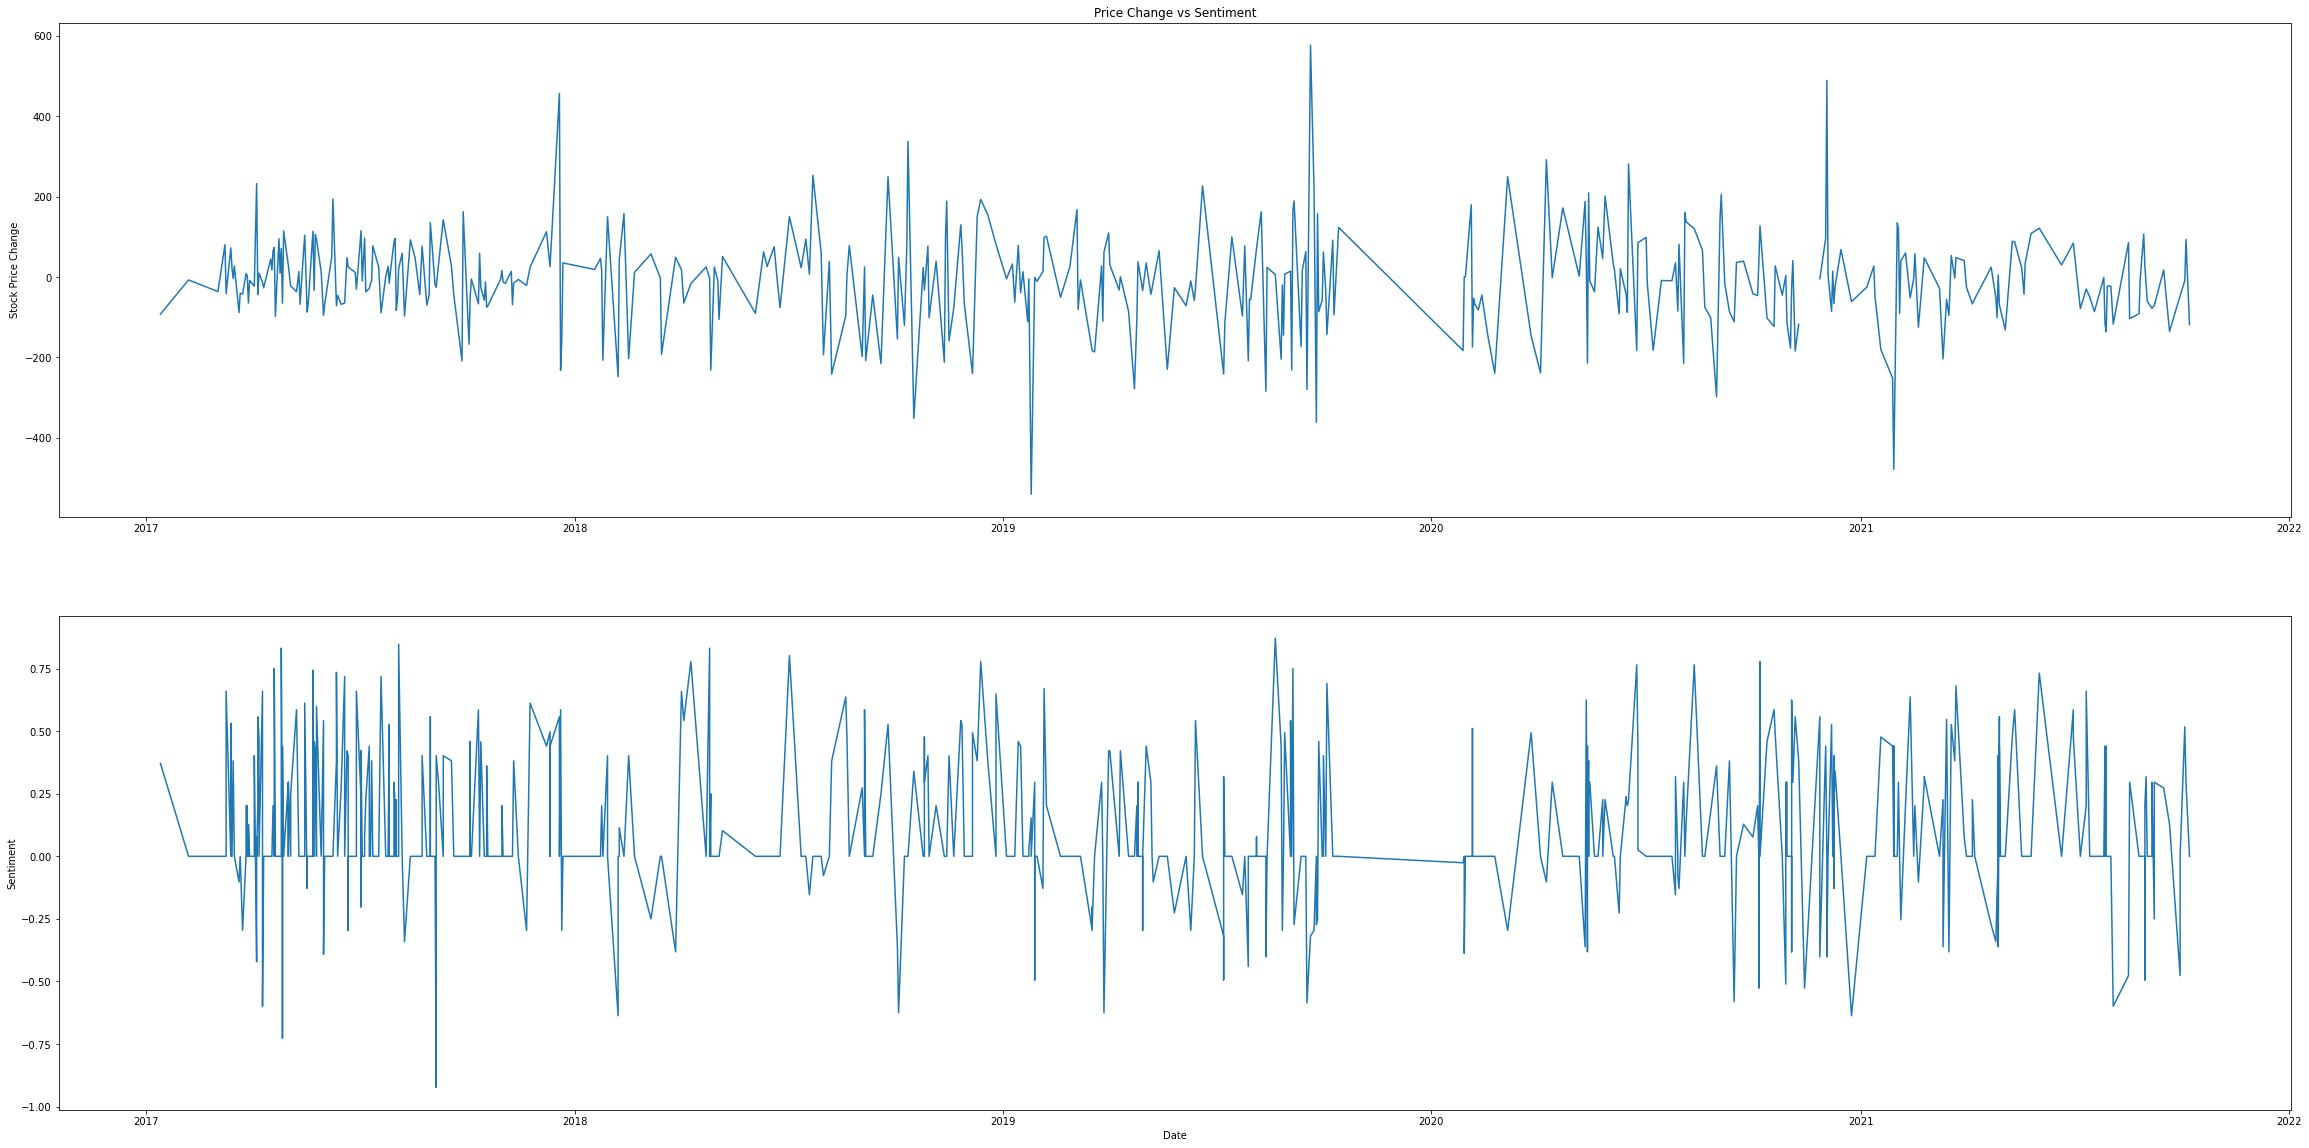

In [82]:
#chart with size (40,20)
# Idexx Laboratories
plt.figure(figsize=(40,20))

x = l.date2

y1 = l.change
y2 = l.polarity

plt.subplot(2, 1, 1)
plt.plot(x, y1)
plt.title('Price Change vs Sentiment')
plt.ylabel('Stock Price Change')

plt.subplot(2, 1, 2)
plt.plot(x, y2)
plt.xlabel('Date')
plt.ylabel('Sentiment')

plt.show()